<h1>Shap</h1>

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import shap

from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier

In [2]:
warnings.filterwarnings('ignore')

def setup_matplot(titlesize=int(14),labelsize=int(12)):
    import matplotlib.pyplot as plt
    plt.rcParams['figure.figsize'] = [10,8]
    plt.rcParams['figure.titlesize'] = titlesize
    plt.rcParams['figure.labelsize'] = labelsize
    return(plt)

plt = setup_matplot()

In [3]:
path = 'database/diabetes.csv'

df = pd.read_csv(f'{path}')

In [4]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

y = df['Outcome']

In [5]:
features_names = list(X.columns)

features_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [6]:
X = X.to_numpy()
y = y.to_numpy()

In [7]:
random_state=1122

In [8]:
estimator = GradientBoostingRegressor(random_state = random_state)

estimator.fit(X, y)

GradientBoostingRegressor(random_state=1122)

In [18]:
explainer = shap.Explainer(estimator.predict,X)

shap_values = explainer(X)

Exact explainer: 769it [00:26, 17.93it/s]                         


In [22]:
shap_values.feature_names

['Feature 0',
 'Feature 1',
 'Feature 2',
 'Feature 3',
 'Feature 4',
 'Feature 5',
 'Feature 6',
 'Feature 7']

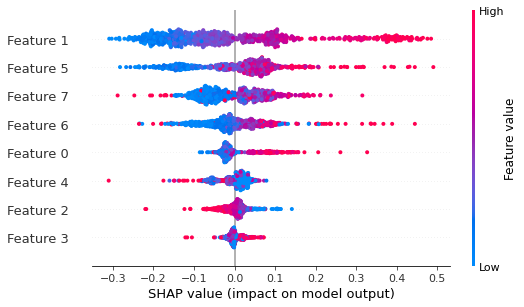

In [33]:
shap.plots.beeswarm(shap_values)

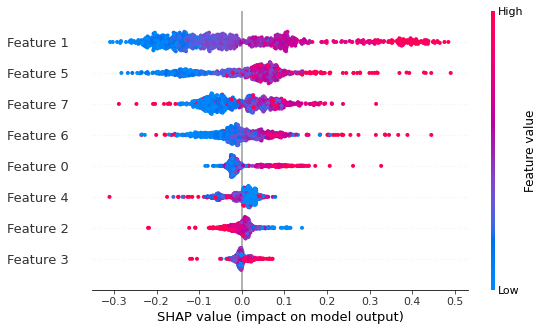

In [21]:
shap.summary_plot(shap_values, max_display=15, show=True)

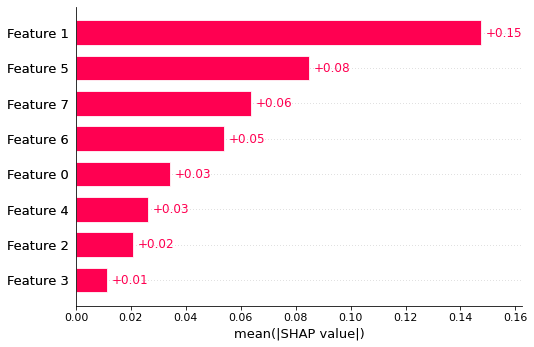

In [34]:
shap.plots.bar(shap_values)

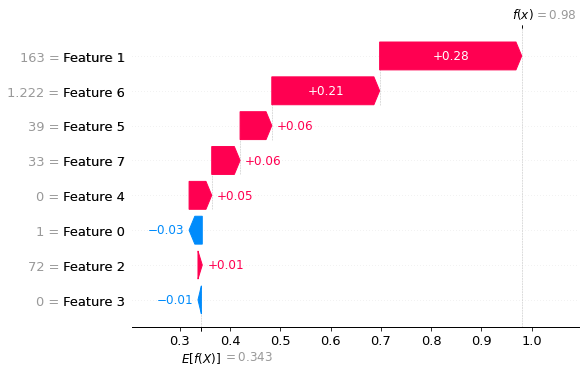

In [40]:
shap.plots.waterfall(shap_values[100], max_display=14)

In [31]:
# shap.plots.waterfall(shap_values[X])

In [32]:
# shap.plots.waterfall(shap_values[sample_index], max_display=14)

In [52]:
estimator = RandomForestClassifier(random_state = random_state)

estimator.fit(X, y)

RandomForestClassifier(random_state=1122)

In [53]:
estimator.predict

<bound method ForestClassifier.predict of RandomForestClassifier(random_state=1122)>

In [57]:
explainer = shap.TreeExplainer(estimator) 
shap_values = explainer.shap_values(X) 

In [58]:
shap_values

[array([[-7.05328231e-03, -1.67059546e-01, -5.14302729e-03, ...,
         -7.83949238e-02, -8.27960033e-02, -1.43935306e-01],
        [ 4.48837083e-02,  1.98324053e-01,  6.29028062e-04, ...,
          9.75117933e-02,  7.19636263e-03, -5.57731823e-02],
        [-1.02208572e-01, -3.74355744e-01, -3.22677295e-02, ...,
          1.30280768e-01, -2.36459111e-02, -8.30271445e-02],
        ...,
        [ 1.66311837e-02,  7.17351114e-02,  1.29410164e-02, ...,
          1.20773321e-01,  4.46528978e-02, -1.96872643e-02],
        [ 1.39733919e-04, -7.24250512e-02, -2.56823473e-02, ...,
         -7.90080204e-02, -4.08412566e-02, -2.10118761e-01],
        [ 3.44755544e-02,  1.73702698e-01,  1.41322563e-02, ...,
         -1.86428344e-03,  2.89544038e-02,  8.47482019e-02]]),
 array([[ 7.05328231e-03,  1.67059546e-01,  5.14302729e-03, ...,
          7.83949238e-02,  8.27960033e-02,  1.43935306e-01],
        [-4.48837083e-02, -1.98324053e-01, -6.29028062e-04, ...,
         -9.75117933e-02, -7.19636263e

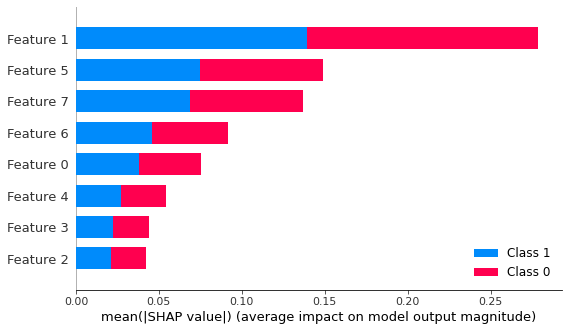

In [59]:
shap.summary_plot(shap_values, X) 